# Sequential Learning

The goal of this notebook is to successfully update a prior distribution for our linear regression coefficients with each addition of a data point. This can easily be generalized to linear basis function models by replacing $x_{i}$ with $\phi (x_{i})$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Remember that for linear regression models, we assume that our target values $t_{i} = y(\textbf{x}, \textbf{w}) + \epsilon$, where $y(\textbf{x}, \textbf{w}) = \textbf{w}^T\textbf{x}$ for $w = (w_{0}, w_{1}, ... , w_{D})$ and $x = (x_{0}, x_{1}, ... , x_{D})$.

Since $\epsilon \sim N(0, \beta^{-1})$, we can write the distribution of $t_{i}$ as 
$$p(t|\textbf{x}, \textbf{w}, \beta) = N(t|y(\textbf{x}, \textbf{w}), \beta^{-1})$$ 

Further assuming that our $t_{i}$'s are i.i.d., we can write the distribution of $\textbf{t} = (t_{1}, t_{2}, ... , t_{N})$ as 
$$ p(\textbf{t}|\textbf{X}, \textbf{w}, \beta) = {\displaystyle \prod_{n=1}^{N}} N(t_{n}|\textbf{w}^T\textbf{x}_{n}, \beta^{-1})$$

We are taking a Bayesian approach to linear regression, and considering a zero mean and isotropic distribution of $w$, we can also write the distribution of $w$ as the following:
$$ p(\textbf{w}) = N(\textbf{w}|\textbf{m}_{0}, \textbf{S}_{0}) = N(\textbf{w}|0, \alpha^{-1}I)$$
where $\alpha$ is a constant.

This prior is Gaussian, and so the posterior will also be Gaussian:
$$ p(\textbf{w}|\textbf{t}) = N(\textbf{w}|\textbf{m}_{N}, \textbf{S}_{N})$$
where 
$$\textbf{m}_{N} = \textbf{S}_{N}(\textbf{S}_{0}^{-1}\textbf{m}_{0} + \beta \Phi^T \textbf{t}) = \beta \textbf{S}_{N} \Phi^T \textbf{t}$$
$$\textbf{S}_{N}^{-1} = \textbf{S}_{0}^{-1} + \beta \Phi^T \Phi = \alpha I + \beta \Phi^T \Phi$$

It is important to note that $\Phi$ and $\textbf{t}$ contain all the data and target values, so the whole dataset must be kept for each iteration.

do we have to maximize likelihood?

Working in 2D, our $x_{i}$'s will be scalars and $w = (w_{0}, w_{1})$ such that $t_{i} = w_{0} + w_{1}x_{1}$. To simulate a dataset we can sample our $x_{i}$'s and $\epsilon_{i}$'s from univariate Gaussian distributions.

(0, 25)

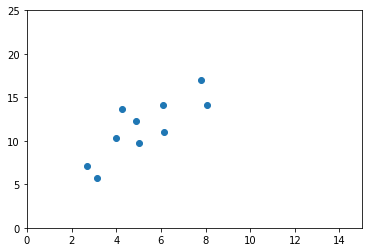

In [108]:
mu = 5
sigma = 2
numpoints = 10

epsmu = 0
beta = 2

x = np.random.normal(loc = mu, scale = sigma, size = numpoints)
eps = np.random.normal(loc = epsmu, scale = beta, size = numpoints)
t = 2 * x + eps

plt.scatter(x, t)
plt.xlim([0, 15])
plt.ylim([0, 25])

In [72]:
wmu = np.array([0, 0])
alpha = 0.5
wsigma = alpha * np.eye(2)

In [74]:
w = np.random.multivariate_normal(mean = wmu, cov = wsigma, size = 1)
w

array([[-0.68732838,  0.05253673]])